In [2]:
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [4]:
from keras.datasets import mnist
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()
 

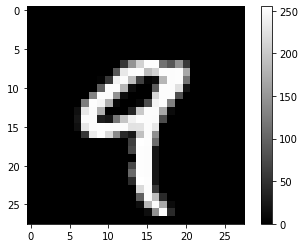

In [3]:
plt.imshow(X_train[4],cmap='gist_gray')
plt.colorbar()

In [5]:
X_train = X_train/ 255.0
X_test = X_test / 255.0 
#scaling it between 0 and 1

In [6]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=10,activation='sigmoid')
])

In [7]:
model.compile(optimizer='adam',loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True)
                                                                              ,metrics=['accuracy'])

In [8]:
model.fit(X_train,Y_train,epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 26s 432us/sample - loss: 1.5672 - accuracy: 0.9102
Epoch 2/10
60000/60000 [==============================] - 5s 89us/sample - loss: 1.5102 - accuracy: 0.9514
Epoch 3/10
60000/60000 [==============================] - 5s 83us/sample - loss: 1.4975 - accuracy: 0.9640
Epoch 4/10
60000/60000 [==============================] - 5s 88us/sample - loss: 1.4906 - accuracy: 0.9702
Epoch 5/10
60000/60000 [==============================] - 5s 75us/sample - loss: 1.4860 - accuracy: 0.9750
Epoch 6/10
60000/60000 [==============================] - 5s 83us/sample - loss: 1.4828 - accuracy: 0.9773
Epoch 7/10
60000/60000 [==============================] - 5s 76us/sample - loss: 1.4804 - accuracy: 0.9798
Epoch 8/10
60000/60000 [==============================] - 6s 95us/sample - loss: 1.4782 - accuracy: 0.9821
Epoch 9/10
60000/60000 [==============================] - 5s 91us/sample - loss: 1.4770 - accuracy: 0.9829
Epoch 10/10


In [9]:
pred=model.predict(X_test)

In [10]:
 for i in range(20):
    print(f" true {Y_test[i]} and predicted {np.argmax(pred[i])}")
    
   

 true 7 and predicted 7
 true 2 and predicted 2
 true 1 and predicted 1
 true 0 and predicted 0
 true 4 and predicted 4
 true 1 and predicted 1
 true 4 and predicted 4
 true 9 and predicted 9
 true 5 and predicted 5
 true 9 and predicted 9
 true 0 and predicted 0
 true 6 and predicted 6
 true 9 and predicted 9
 true 0 and predicted 0
 true 1 and predicted 1
 true 5 and predicted 5
 true 9 and predicted 9
 true 7 and predicted 7
 true 3 and predicted 8
 true 4 and predicted 4


# 2nd method or way

In [1]:
from keras.datasets import mnist
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

Using TensorFlow backend.


In [2]:
train_images=train_images.reshape(60000,784)
test_images=test_images.reshape(10000,784)
train_images=train_images.astype('float32')
test_images=test_images.astype('float32')
train_images=train_images/255.0
test_images=test_images/255.0

In [3]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout

In [4]:
model=Sequential()
model.add(Dense(512,input_shape=(784,)))
model.add(Activation('relu') )
model.add(Dropout(0.2))                 
model.add(Dense(512))
model.add(Activation('relu') )
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

In [5]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'],
optimizer='adam')

In [6]:
from keras.utils import to_categorical
n_classes = 10
train_labels = to_categorical(train_labels, n_classes)
test_labels = to_categorical(test_labels, n_classes)

In [7]:
model.fit(train_images,train_labels,epochs=10,validation_data=(test_images,test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 30s 494us/step - loss: 0.2138 - accuracy: 0.9349 - val_loss: 0.1024 - val_accuracy: 0.9688
Epoch 2/10
60000/60000 [==============================] - 31s 519us/step - loss: 0.1066 - accuracy: 0.9668 - val_loss: 0.0917 - val_accuracy: 0.9725
Epoch 3/10
60000/60000 [==============================] - 31s 509us/step - loss: 0.0820 - accuracy: 0.9743 - val_loss: 0.0924 - val_accuracy: 0.9742
Epoch 4/10
60000/60000 [==============================] - 33s 547us/step - loss: 0.0683 - accuracy: 0.9789 - val_loss: 0.0773 - val_accuracy: 0.9781
Epoch 5/10
60000/60000 [==============================] - 33s 546us/step - loss: 0.0567 - accuracy: 0.9824 - val_loss: 0.0753 - val_accuracy: 0.9788
Epoch 6/10
60000/60000 [==============================] - 33s 549us/step - loss: 0.0490 - accuracy: 0.9846 - val_loss: 0.0683 - val_accuracy: 0.9815
Epoch 7/10
60000/60000 [==============================] 

In [12]:
pred=model.predict(test_images)
for i in range(20):
    print(f" true {np.argmax(test_labels[i])} and predicted {np.argmax(pred[i])}")
    
   

 true 7 and predicted 7
 true 2 and predicted 2
 true 1 and predicted 1
 true 0 and predicted 0
 true 4 and predicted 4
 true 1 and predicted 1
 true 4 and predicted 4
 true 9 and predicted 9
 true 5 and predicted 5
 true 9 and predicted 9
 true 0 and predicted 0
 true 6 and predicted 6
 true 9 and predicted 9
 true 0 and predicted 0
 true 1 and predicted 1
 true 5 and predicted 5
 true 9 and predicted 9
 true 7 and predicted 7
 true 3 and predicted 3
 true 4 and predicted 4


In [4]:
from keras.datasets import mnist
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

Using TensorFlow backend.


In [5]:
model=keras.Sequential()

In [6]:
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1))) 

In [7]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images= test_images.reshape(test_images.shape[0], 28, 28, 1)
 
train_images = train_images.astype('float32')
test_images= test_images.astype('float32')
train_images/= 255
test_images/= 255

In [8]:
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2))) 
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(10,activation='sigmoid'))

In [9]:
model.compile(optimizer='adam',loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [10]:
model.fit(train_images,train_labels,epochs=10,validation_data=(test_images,test_labels)) 

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 46s 769us/sample - loss: 1.5277 - accuracy: 0.9393 - val_loss: 1.4862 - val_accuracy: 0.9763
Epoch 2/10
60000/60000 [==============================] - 37s 613us/sample - loss: 1.4828 - accuracy: 0.9793 - val_loss: 1.4807 - val_accuracy: 0.9804
Epoch 3/10
60000/60000 [==============================] - 40s 668us/sample - loss: 1.4759 - accuracy: 0.9851 - val_loss: 1.4775 - val_accuracy: 0.9828
Epoch 4/10
60000/60000 [==============================] - 40s 671us/sample - loss: 1.4731 - accuracy: 0.9883 - val_loss: 1.4766 - val_accuracy: 0.9851
Epoch 5/10
60000/60000 [==============================] - 41s 680us/sample - loss: 1.4706 - accuracy: 0.9905 - val_loss: 1.4752 - val_accuracy: 0.9853
Epoch 6/10
60000/60000 [==============================] - 41s 690us/sample - loss: 1.4691 - accuracy: 0.9916 - val_loss: 1.4749 - val_accuracy: 0.9858
Epoch 7/10
60000/60000 [====================

In [11]:
#now predict the results